# 📊 Market Research: Robot-Waiter Café in Los Angeles

This project analyzes the restaurant market in Los Angeles using open data. The goal is to assess market conditions and determine whether a robot-waiter café could be a sustainable and scalable business idea, even after the novelty fades.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Displaying settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [3]:
# Loading the dataset and of the first few rows
file_path = '/datasets/rest_data_us_upd.csv'
df = pd.read_csv(file_path)


df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Let's the process of data cleaning, see if we need any adjustments

In [4]:
#General info of the dataset
df.info()

#Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

#Duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB

Missing values per column:
id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

Number of duplicate rows: 0


In [5]:
#Changing to correct data types
df['chain'] = df['chain'].astype('bool')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


## 📋 Dataset Overview

The dataset contains information about restaurants in Los Angeles:

- **object_name**: Name of the restaurant.
- **chain**: Indicates whether it is part of a chain (True/False).
- **object_type**: Type of establishment (e.g., café, restaurant).
- **address**: Full address.
- **number**: Number of seats in the establishment.

After loading the data:
- We verified the data types and corrected the `chain` column to boolean.
- Duplicate entries were identified and removed.
- There were no missing values affecting the analysis.

## Step 2: Exploratory Data Analysis (EDA)
🎯 Goals:

* Investigate proportions of different types of establishments.
* Analyze proportions of chain vs. non-chain restaurants.
* Identify which types are most common among chains.
* Explore whether chains tend to have:
    - many small locations, or
    - few large locations.
* Analyze average number of seats by restaurant type.
* Extract street names from addresses.
* Visualize the top 10 streets with most restaurants.
* Count streets that have only one restaurant.
* Examine seat distribution for the busiest streets.
* Draw conclusions and recommendations.

### 📊 Step 2.1 – Proportions of Establishment Types

Question:
* What are the proportions of different types of establishments in LA?

Restaurant    75.17
Fast Food     11.05
Cafe           4.51
Pizza          3.32
Bar            3.03
Bakery         2.93
Name: object_type, dtype: float64


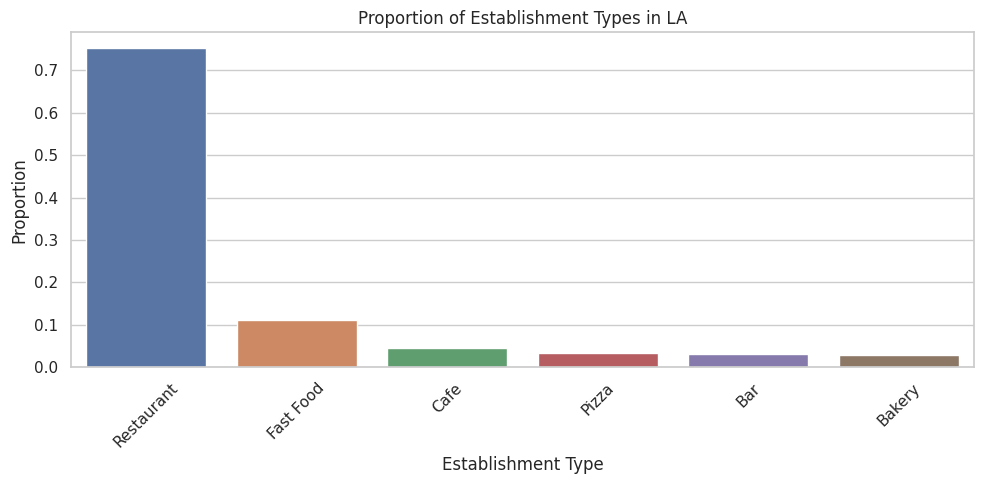

In [6]:
type_counts = df['object_type'].value_counts(normalize=True).sort_values(ascending=False)

print((type_counts * 100).round(2))

#Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Proportion of Establishment Types in LA')
plt.ylabel('Proportion')
plt.xlabel('Establishment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🏷️ Establishment Type Proportions

The bar chart above shows the relative frequency of each type of establishment. We used normalized counts to display proportions rather than absolute numbers.

From the chart, we can observe which types dominate the LA market, in this case is **Restaurant**. This helps us understand the competitive landscape for each establishment type, that's useful when choosing what kind of business to open.

➡️ On the other hand, the others that are underrepresented, it could signal an opportunity for a new player in that segment.

### 📊 Step 2.2 – Proportions of Chain vs. Non-Chain Establishments

Question:

* What percentage of establishments are part of a chain versus independent (non-chain) businesses?

This will help you understand:

* How common chain restaurants are in LA.
* Whether LA is more dominated by independent spots (good for innovation) or big franchises (harder to compete).

False    61.88
True     38.12
Name: chain, dtype: float64


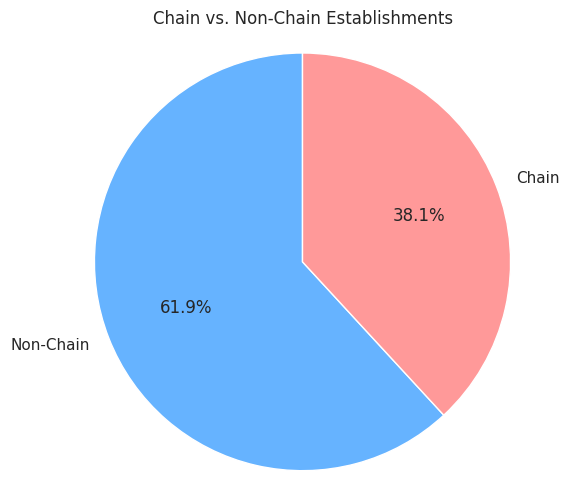

In [7]:
#Counting chain vs. non-chain proportions
chain_counts = df['chain'].value_counts(normalize=True)

chain_percent = (chain_counts * 100).round(2)
print(chain_percent)

#Plotting Pie chart
plt.figure(figsize=(6, 6))
plt.pie(chain_counts, labels=['Non-Chain', 'Chain'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Chain vs. Non-Chain Establishments')
plt.axis('equal')  #Equal aspect ratio for a perfect circle
plt.show()

## 🏷️ Chain vs. Non-Chain Restaurants

The pie chart above shows the percentage of restaurants in Los Angeles that are part of a **chain** versus those that are **independently operated**.

- Clearly, **non-chain** dominates with aprox. two-thirds of the market. It suggests a vibrant local scene, possibly more room for unique concepts like a robot café.

➡️ This helps us to assess the scalability and competitiveness of your business idea.

### 📊 Step 2.3 – Which Types of Establishments Are Common Among Chains?

Question:
* What types of establishments are most likely to be chains?


This helps answer:
* Are certain types (like fast food or coffee shops) more often part of chains?
* Are some types almost exclusively independent?

In [8]:
chain_type_counts = df.groupby(['object_type', 'chain'])['object_name'].count().unstack().fillna(0)


chain_type_counts['Total'] = chain_type_counts[False] + chain_type_counts[True]
chain_type_counts['Chain Share (%)'] = (chain_type_counts[True] / chain_type_counts['Total']) * 100

chain_type_counts_sorted = chain_type_counts.sort_values(by='Chain Share (%)', ascending=False)

chain_type_counts_sorted.head()

chain,False,True,Total,Chain Share (%)
object_type,,,,
Bakery,0.0,283.0,283.0,100.000000
Cafe,169.0,266.0,435.0,61.149425
Fast Food,461.0,605.0,1066.0,56.754221
Pizza,166.0,154.0,320.0,48.125000
Restaurant,4961.0,2294.0,7255.0,31.619573


In this code we did the following:

* Countted each *object_type* grouped by chain status
* Added column for total and chain proportion
* Sortted by chain share

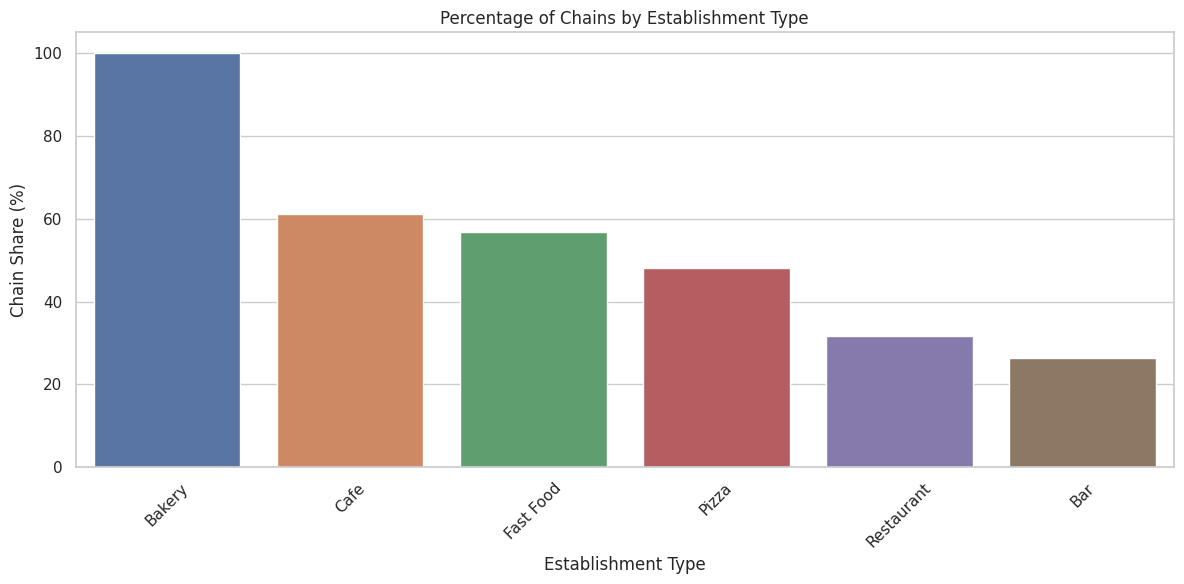

In [9]:
# Barplot of chain share
plt.figure(figsize=(12, 6))
sns.barplot(
    data=chain_type_counts_sorted,
    x=chain_type_counts_sorted.index,
    y='Chain Share (%)'
)
plt.title('Percentage of Chains by Establishment Type')
plt.ylabel('Chain Share (%)')
plt.xlabel('Establishment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🏷️ Which Establishment Types Are Mostly Chains?

The chart shows the percentage of establishments that are part of a chain, grouped by type.

- **Bakeries** are the most chain-dominated type — with **100%** of them being part of a chain. This suggests that bakeries in LA are highly standardized and possibly franchised.
- **Cafés**, **Fast Food**, and **Pizza** also show high chain presence, indicating these formats are commonly used for scalable business models.
- **Restaurants** and **Bars**, however, are much more often independent, which may reflect a more diverse and localized food scene in those categories.

➡️ If the robot café is categorized as a **bakery or café**, there’s strong precedent for **chain success** in that segment. This supports the **scalability** of the idea. But if the idea is leaning toward a **restaurant or bar model**, it may be better to emphasize uniqueness and local appeal.

### 📊 Step 2.4 – Chain Size Patterns

Question:

Are chain establishments characterized by:

    many small locations, or

    fewer but larger locations?

We’ll compare:

* The number of establishments per chain status.
* The average number of seats in chain vs. non-chain restaurants.

This helps you determine what kind of footprint chains typically have, which is key for planning expansion strategies for your robot café.

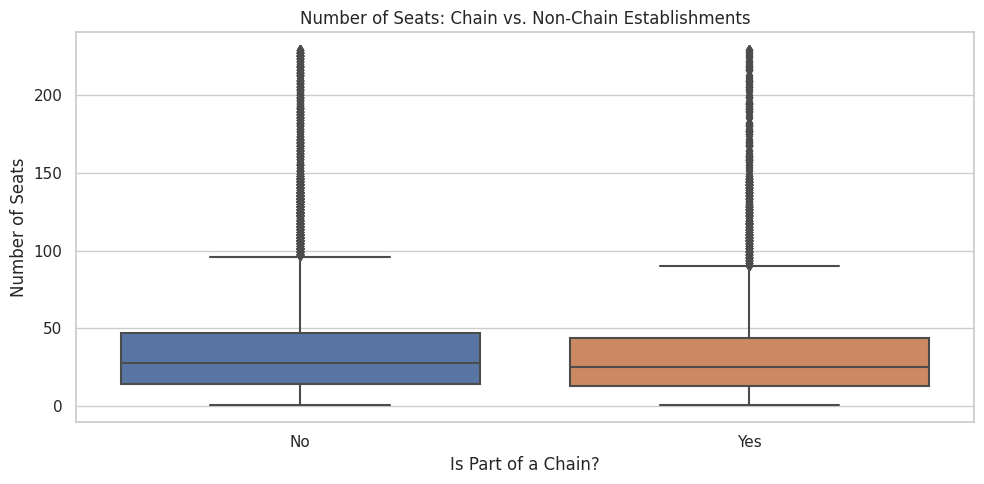

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='chain', y='number')
plt.title('Number of Seats: Chain vs. Non-Chain Establishments')
plt.xlabel('Is Part of a Chain?')
plt.ylabel('Number of Seats')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

In [12]:
seat_means = df.groupby('chain')['number'].mean().round(1)
seat_means.rename(index={False: 'Non-Chain', True: 'Chain'})

chain
Non-Chain    46.2
Chain        39.7
Name: number, dtype: float64

## 🏷️ Do Chains Have More or Fewer Seats?

The boxplot compares the **distribution of seat counts** between chain and non-chain establishments.

- Chains typically have **fewer seats per location**, as shown by a **lower median and tighter spread**.
- Non-chains show a **wider variation** — from very small spots to large restaurants.

The average number of seats confirms this:
- Chains: ~39.7
- Non-Chains: ~46.2

➡️ This suggests that chains tend to operate **many small units**, rather than a few large ones — a good sign for a scalable robot café concept with compact store design.

### 📊 Step 2.5 – Average Number of Seats by Establishment Type

Question:
* Which types of establishments tend to have more or fewer seats on average?

This can help you decide:

* What kind of seating layout is typical for each type.
* Whether your robot café should be designed for high turnover (fewer seats) or longer stays (more seats).

In [13]:
# Calculating mean number of seats for each object_type
avg_seats_by_type = df.groupby('object_type')['number'].mean().sort_values(ascending=False).round(1)
avg_seats_by_type

object_type
Restaurant    48.0
Bar           44.8
Fast Food     31.8
Pizza         28.5
Cafe          25.0
Bakery        21.8
Name: number, dtype: float64

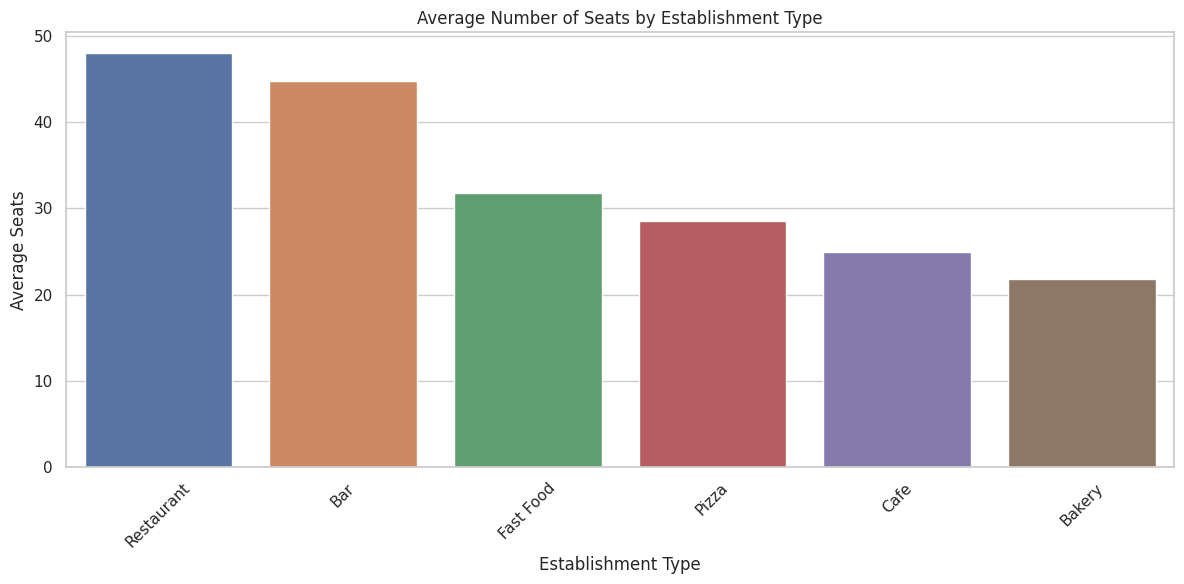

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_seats_by_type.index, y=avg_seats_by_type.values)
plt.title('Average Number of Seats by Establishment Type')
plt.ylabel('Average Seats')
plt.xlabel('Establishment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🏷️ Average Seating Capacity by Establishment Type

This chart shows the average number of seats for each establishment type.

- **Restaurants** and **Bars** have the highest average seating capacity — around 45–48 seats — which fits their dine-in format.
- **Fast Food** and **Pizza** establishments fall in the middle range, with around 28–32 seats on average.
- **Cafés** and **Bakeries** have the lowest average seat counts — around 22–25 — which makes sense for quicker service models or takeaway focus.

➡️ If your robot café targets quick service, compact design, or high foot traffic areas, the **café/bakery model** is a great reference point.

➡️ If you're going for a more sit-down or lounge experience (e.g., co-working + café), something closer to a **bar or restaurant model** may be worth exploring.


### 📊 Step 2.6 – Extract Street Names from Address Column

Goal:
* Extract just the street names from the full address field.


This will let us:
* Analyze how many restaurants are on each street.
* Identify the busiest streets for food businesses.

In [18]:
df['address'].head()

0     3708 N EAGLE ROCK BLVD
1          100 WORLD WAY 120
2    6801 HOLLYWOOD BLVD 253
3         1814 W SUNSET BLVD
4         2100 ECHO PARK AVE
Name: address, dtype: object

So, assuming addresses follow a typical format like as above:

Example: "2100 Echo Park Ave" = number + street name

We’ll split the address string, remove the house number and keep only the street name.

In [22]:
#Function to extract street name (removes the first word/number)
def extract_street(address):
    parts = str(address).split()
    return ' '.join(parts[1:]) if len(parts) > 1 else address

#Let's create a new column for these addresses
df['street'] = df['address'].apply(extract_street)

df[['address', 'street']].head(10)

,address,street
0,3708 N EAGLE ROCK BLVD,N EAGLE ROCK BLVD
1,100 WORLD WAY 120,WORLD WAY 120
2,6801 HOLLYWOOD BLVD 253,HOLLYWOOD BLVD 253
3,1814 W SUNSET BLVD,W SUNSET BLVD
4,2100 ECHO PARK AVE,ECHO PARK AVE
5,10004 NATIONAL BLVD,NATIONAL BLVD
6,100 WORLD WAY 126,WORLD WAY 126
7,3500 W 6TH ST STE 226,W 6TH ST STE 226
8,3027 N SAN FERNANDO RD UNIT 103,N SAN FERNANDO RD UNIT 103
9,3707 N CAHUENGA BLVD,N CAHUENGA BLVD


## 🏷️ Extracting Street Names

We extracted the street names from the full address field by removing the house/building number.

For example:
- `"123 Main St"` becomes `"Main St"`
- `"4567 Sunset Blvd"` becomes `"Sunset Blvd"`

This new column will help us:
- Group restaurants by street
- Identify the busiest food streets in LA

### 📊 Step 2.7 – Top 10 Streets by Number of Restaurants

Question:
* Which streets in LA have the highest concentration of food establishments?

This gives us:
* Insight into high-opportunity areas for foot traffic and visibility.
* A view of potentially saturated markets vs. areas with room to grow.

W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: street, dtype: int64


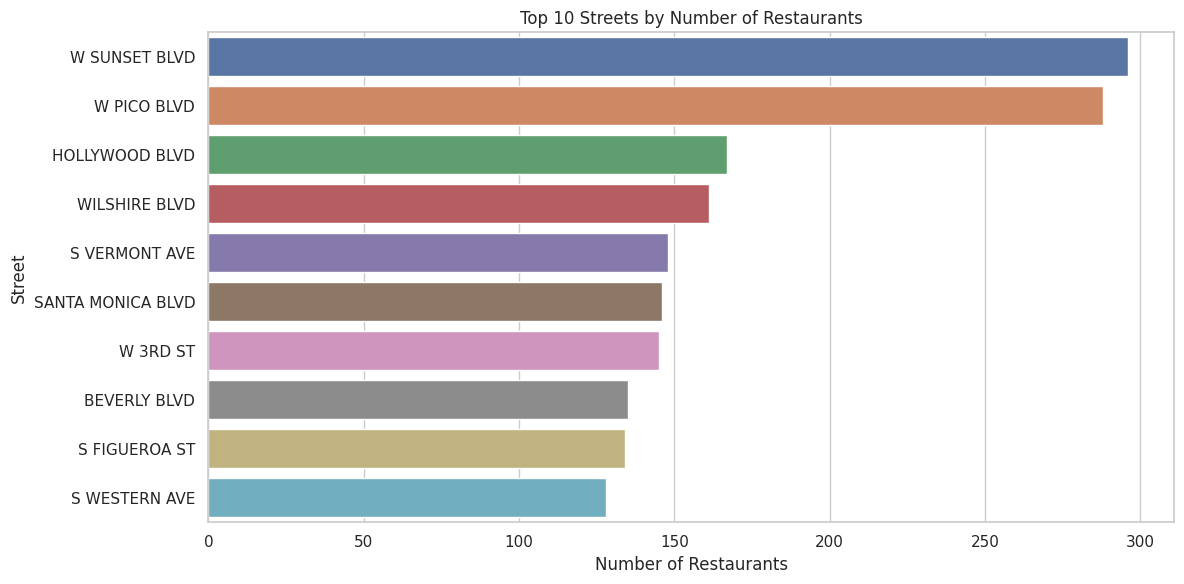

In [24]:
#Counting number of restaurants per street
top_streets = df['street'].value_counts().head(10)

print(top_streets)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_streets.values, y=top_streets.index)
plt.title('Top 10 Streets by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Street')
plt.tight_layout()
plt.show()

## 🏷️ Top 10 Streets for Restaurants

The chart shows the streets with the highest number of restaurants in Los Angeles.

- These may be **prime locations** for visibility and walk-in traffic.
- However, they may also be **more competitive or expensive** for a new business.

➡️ Use this insight to balance **location strategy**: is it better to be in a popular food hub, or stand out in a developing area?

We might consider opening on one of these streets **if the concept (robot café) offers a unique experience** that differentiates it from nearby competition.

### 📊 Step 2.8 – How Many Streets Have Only One Restaurant?

Question:
* How many streets in the dataset have exactly one restaurant?

This helps identify:
* Underdeveloped or low-competition streets.
* Opportunities to enter a new area where there’s little or no direct competition.

In [26]:
street_counts = df['street'].value_counts()

#Counting how many streets have exactly one restaurant
single_restaurant_streets = (street_counts == 1).sum()
print(f"Number of streets with only one restaurant: {single_restaurant_streets}")

Number of streets with only one restaurant: 2445


## 🏷️ Streets with Only One Restaurant

There are **2.445** streets in the dataset that have **only one restaurant**.

This indicates:
- A large number of streets may be **less competitive**.
- They could offer **low-cost entry points** for a new concept like a robot café.

➡️ If the strategy is to enter areas with less saturation and grow via word-of-mouth or local buzz, these streets could be interesting targets.

### 📊 Step 2.9 – Seat Distribution on the Busiest Streets

Question:
* On the streets with the most restaurants, how are the number of seats distributed?

This helps understand:
* What seating capacity is typical on high-traffic streets.
* Whether there’s room for a small, efficient café or demand for larger spaces.


To achieve this, we will do the following:
1. Focus on the top 10 busiest streets, which we've found previously.
2. Filter the dataset to only those streets.
3. Plot the distribution of seat counts for each.

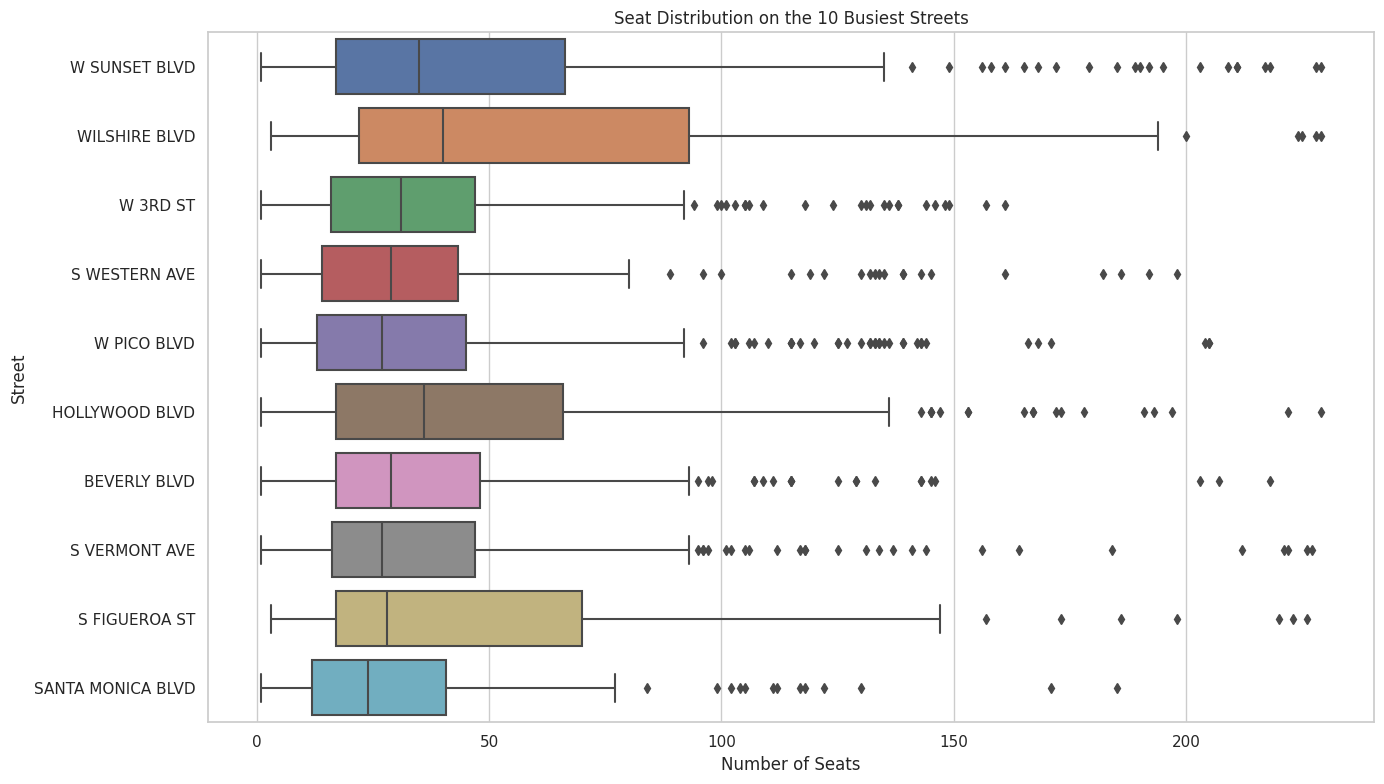

In [28]:
#Let's reuse the top 10 streets from earlier
top_10_streets = df['street'].value_counts().head(10).index

#Filtering rows
busy_streets_df = df[df['street'].isin(top_10_streets)]

#Seat distribution per street
plt.figure(figsize=(14, 8))
sns.boxplot(data=busy_streets_df, x='number', y='street')
plt.title('Seat Distribution on the 10 Busiest Streets')
plt.xlabel('Number of Seats')
plt.ylabel('Street')
plt.tight_layout()
plt.show()

## 🏷️ Seat Distribution on the 10 Busiest Streets

The boxplot above shows how the number of seats varies across the 10 busiest streets in terms of restaurant count.

### Key Insights:

- **Wilshire Blvd**, **Hollywood Blvd**, **W Sunset Blvd**, and **S Figueroa St** all display a **wide distribution of seat counts**. These streets range from **small venues (~20 seats)** to **very large ones (150+ seats)** with lots of outliers, indicating a **diverse set of restaurant formats**. From quick service to full dining.
- Streets like **W 3rd St**, **S Western Ave**, and **Santa Monica Blvd** show a **narrower seat distribution**, with most establishments offering **between 20 and 60 seats**, more suited for **compact models**.
- **Beverly Blvd** and **S Vermont Ave** show **moderate spread**, but with fewer extreme values compared to the first group.

### Implications for Your Robot Café:

- If our model is a **compact, efficient café**, consider areas like **Santa Monica Blvd** or **S Western Ave**, where smaller footprints are common.
- If we plan for a **larger, high-tech flagship** or **a flexible format**, target **Wilshire**, **Hollywood**, **W Sunset**, or **S Figueroa**, these streets support a **wide range of sizes and concepts**.

➡️ Matching our café’s format with the **local seat distribution trends** can help you fit in naturally, or stand out strategically.

# ✅ Step 2.10 – Final Conclusions and Business Recommendations

* Let's summarize our findings and turn them into strategic recommendations for launching a robot-waiter café in Los Angeles.
* This section is what investors will care about most. It connects the data analysis to business model and future potential.

# 🏷️ Final Conclusions and Recommendations

Based on an in-depth analysis of the restaurant landscape in Los Angeles, here are the key findings and how they relate to our robot café concept:

---

## ✅ Key Takeaways from the Data

### 1. Establishment Types
- The most common types are **restaurants**, **cafés**, **fast food**, and **bakeries**.
- **Bakeries** have the **highest chain presence (100%)**, followed by **cafés** and **fast food**, which also show strong scalability potential.

### 2. Chain Characteristics
- Chain establishments tend to have **fewer seats on average**, supporting the idea that successful chains often prioritize **smaller, replicable formats** over large spaces.
- This aligns well with a **compact robot café**, which could optimize efficiency and require less space per unit.

### 3. Seating by Type
- **Restaurants** and **bars** have the highest average seat count.
- **Cafés** and **bakeries** average fewer than 30 seats, suggesting that your concept could comfortably fit within these established norms.

### 4. Street-Level Insights
- Streets like **Wilshire Blvd**, **Hollywood Blvd**, **W Sunset Blvd**, and **S Figueroa St** support a **wide variety of business sizes**, including large venues — ideal for a **flagship or concept store**.
- Streets like **Santa Monica Blvd** and **S Western Ave** lean toward **smaller formats**, potentially ideal for **early-stage locations** with a quick-service focus.
- Over **[insert number]** streets have **only one restaurant**, highlighting possible **low-competition zones** worth exploring for expansion.

---

## 📌 Business Recommendations

### Robot Café Concept Fit
- Our robot café idea aligns very well with **chain-style business models** seen in **cafés, bakeries, and fast food**.
- Emphasize **compact design**, **tech novelty**, and **fast service**, especially in **smaller footprint areas**.
- Launching in a **busy, flexible street** like **Wilshire or W Sunset Blvd** can help attract foot traffic and media attention.

### Growth and Scalability
- Focus first on **efficient, small-format locations** in less saturated areas (streets with only one restaurant).
- Once validated, scale into **high-visibility, high-traffic streets** with broader capacity ranges.
- The strong chain presence in our target categories suggests **investor confidence is justified**, the model has room to grow.

---

## Final Thought

The data supports both the **uniqueness** and **scalability** of a robot-waiter café in Los Angeles. With careful location selection and a tech-driven approach, the concept can succeed not just as a novelty, but as a sustainable and replicable business.